In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

sns.set()
pd.set_option('display.max_columns', None)

In [46]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

## DataPreprocessing

In [55]:
df = movies.merge(credits, on='title')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [56]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

In [57]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [58]:
df['genres'] = df['genres'].apply(ast.literal_eval)
df['keywords'] = df['keywords'].apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(ast.literal_eval)
df['cast'] = df['cast'].apply(ast.literal_eval)

# Extracting information in a different format
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])
df['keywords'] = df['keywords'].apply(lambda x: [keyword['name'] for keyword in x])
df['production_companies'] = df['production_companies'].apply(lambda x: [company['name'] for company in x])
df['production_countries'] = df['production_countries'].apply(lambda x: [country['name'] for country in x])
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [language['name'] for language in x])
df['cast'] = df['cast'].apply(lambda x: [language['name'] for language in x])

In [59]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [60]:
df_null = df.isnull().sum()
df_null[df_null>0]

homepage        3096
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64

In [61]:
df['homepage'] = df['homepage'].fillna('Not Available')
df['tagline'] = df['tagline'].fillna('Not Available')

df = df.dropna()

In [62]:
def clean_and_join(string):
    new = " ".join(string) 
    new = ''.join(e for e in new if e.isalnum() or e.isspace())  # Remove non alphanumeric character
    return new

In [64]:
columns_to_clean = ['genres','keywords','production_companies',
                    'production_countries','cast','spoken_languages']

df[columns_to_clean] = df[columns_to_clean].map(clean_and_join)

In [66]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners Twentieth Century Fox ...,United States of America United Kingdom,2009-12-10,2787965087,162.0,English Español,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures Jerry Bruckheimer Films S...,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6 bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures Danjaq B24,United Kingdom United States of America,2015-10-26,880674609,148.0,Français English Español Italiano Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Daniel Craig Christoph Waltz Léa Seydoux Ralph...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [68]:
df.crew.value_counts()

crew
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [85]:
# These columns will generate the vector store
df['genre_keywords_similarity'] = df['genres'].str.cat([df['keywords']], sep=' ')

df['production_casting_similarity'] = df['production_companies'].str.cat(
    [df['cast'],df['production_countries']], sep=' ')

In [69]:
df.to_csv('wow.csv')

## EDA

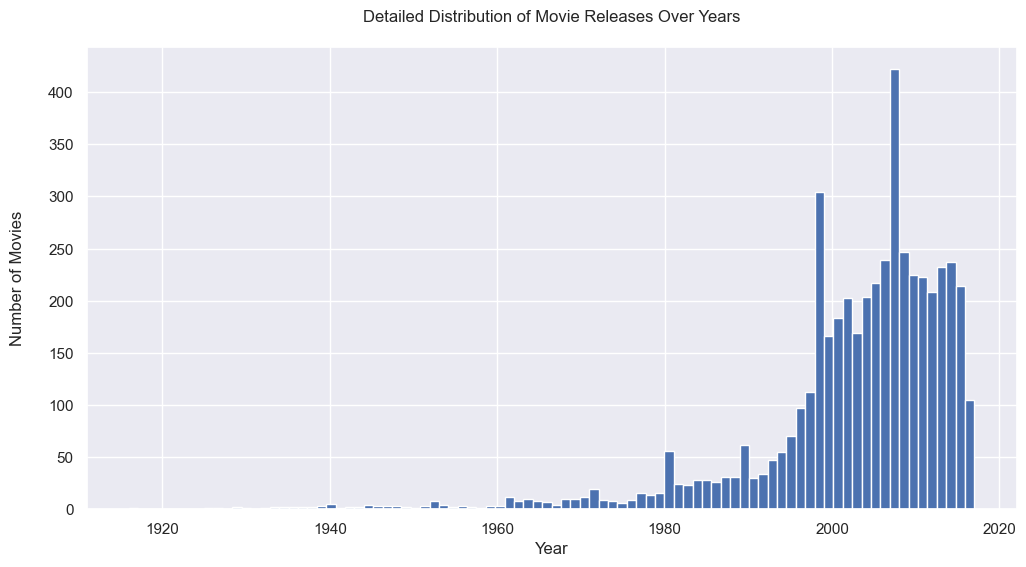

In [78]:
plt.figure(figsize=(12,6))
ax = df['release_date'].dt.year.hist(bins=len(df['release_date'].dt.year.unique()))
ax.set_ylabel("Number of Movies\n")
ax.set_xlabel("Year")
ax.set_title("Detailed Distribution of Movie Releases Over Years\n")
plt.show()

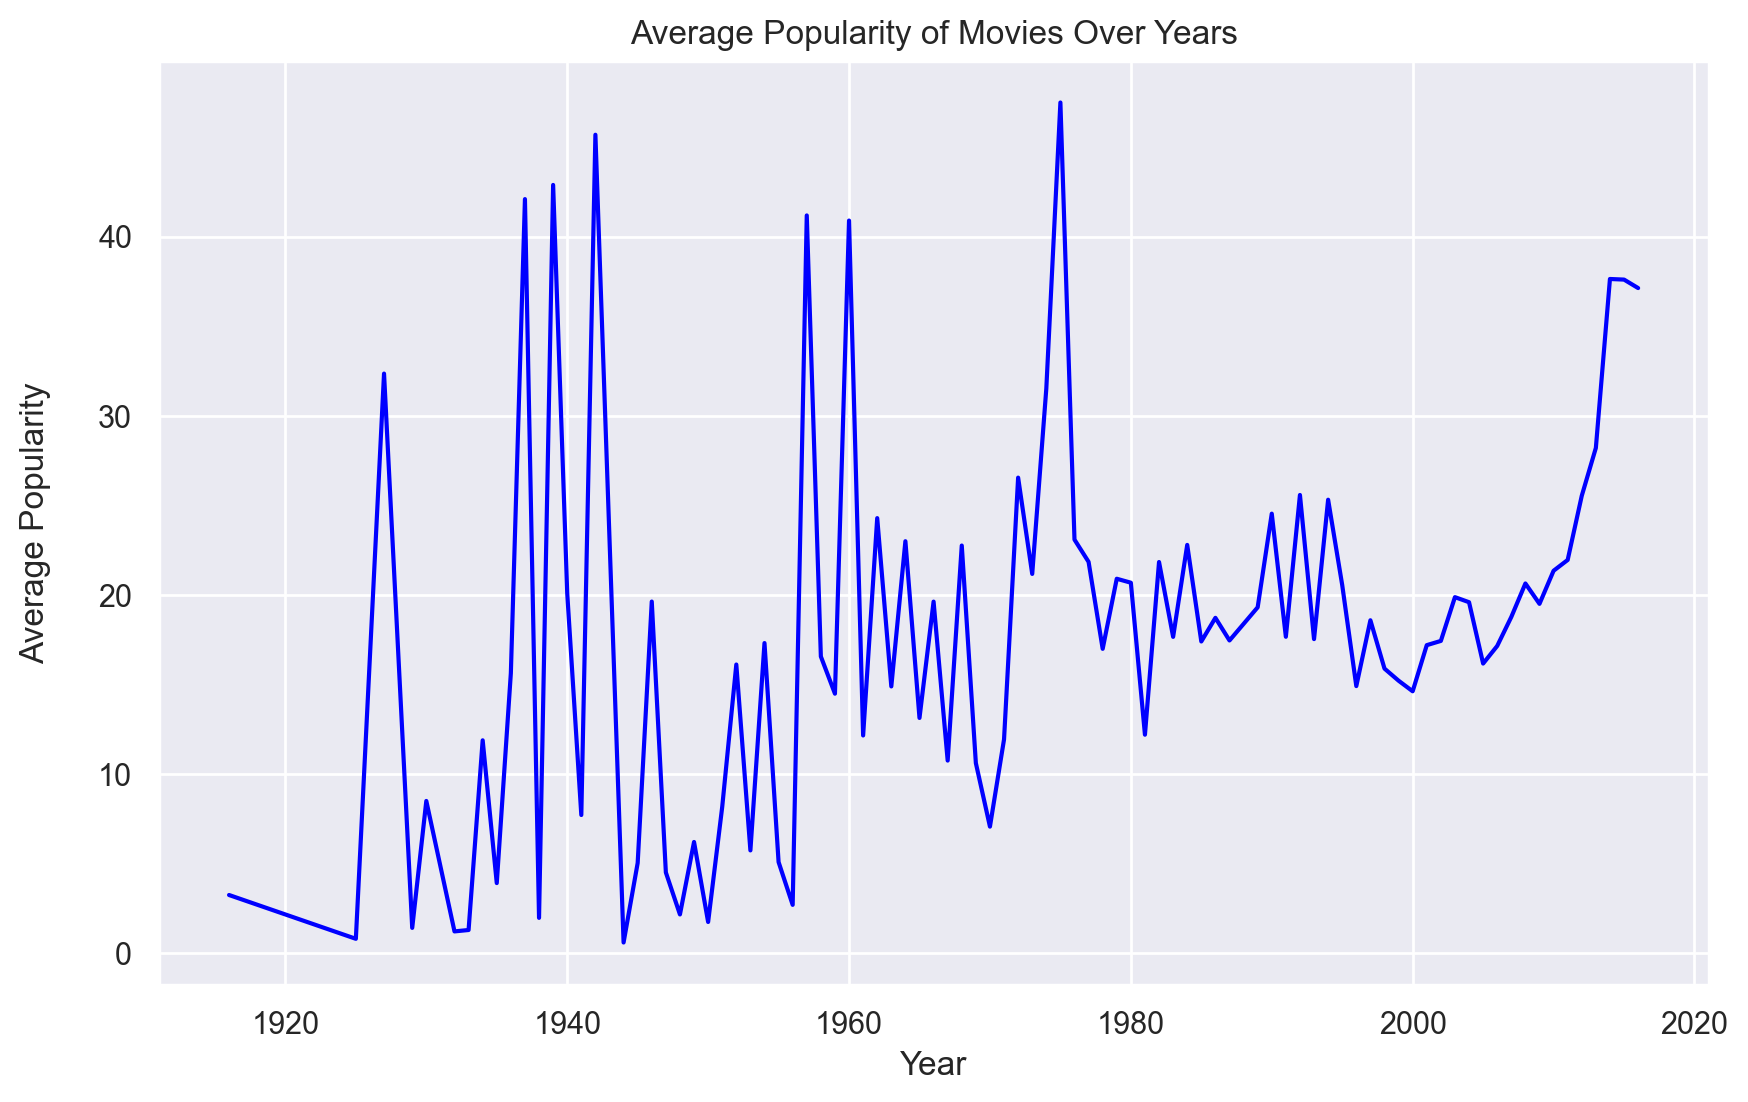

In [81]:
average_popularity_per_year = df.groupby(df['release_date'].dt.year)['popularity'].mean()
average_popularity_per_year = average_popularity_per_year[:-1] # Last point is outlier

# Creating the line plot again without the last point
plt.figure(figsize=(10,6), dpi=200)
average_popularity_per_year.plot(kind='line', color='blue')
plt.title("Average Popularity of Movies Over Years")
plt.ylabel("Average Popularity\n")
plt.xlabel("Year")
plt.show()

In [82]:
movie_index = pd.Series(df.index, index=df['title'])
movie_index.head(10)
# idx = movie_index['Avatar'] # Example usage


title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

In [86]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000)

X_gen = tfidf.fit_transform(df['genre_keywords_similarity'])
X_prod = tfidf.fit_transform(df['production_casting_similarity'])

In [88]:
idx = movie_index['Avatar']
query = X_gen[idx]
query_prod = X_prod[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [92]:
scores_gen = cosine_similarity(query, X_gen)
scores_prod = cosine_similarity(query_prod, X_prod)
scores_gen

array([[1.        , 0.03861274, 0.01940785, ..., 0.02926901, 0.        ,
        0.        ]])

In [96]:
scores_gen = scores_gen.flatten()
scores_prod = scores_prod.flatten()

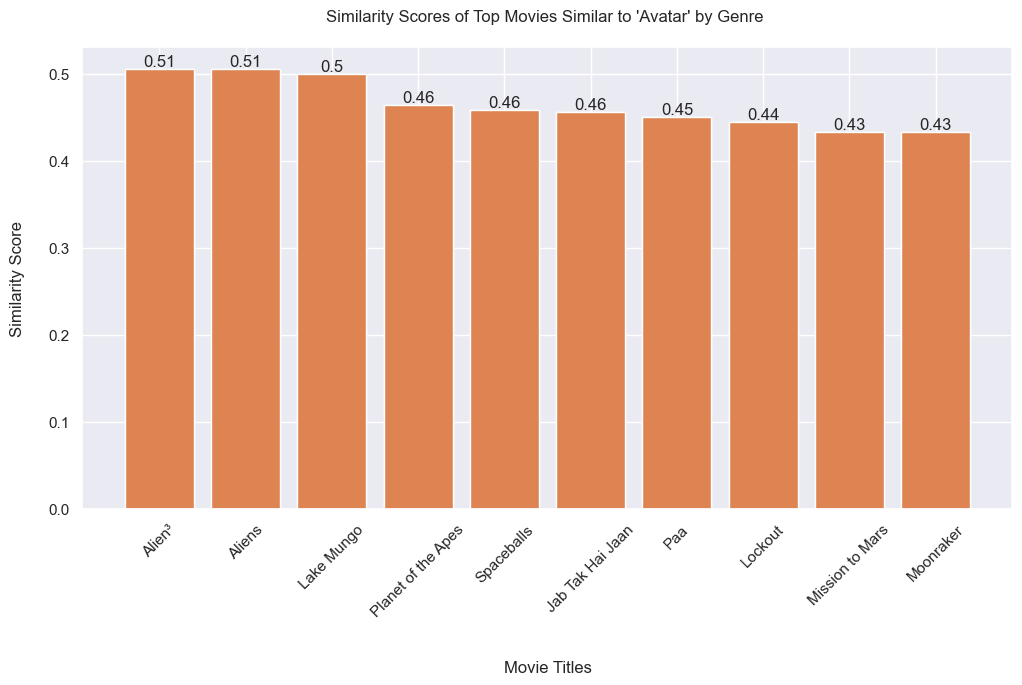

In [105]:
# Sorting indices of movies based on their Genre (cosine) similarity
sorted_indices = np.argsort(-scores_gen)
sorted_indices_excluding_avatar = sorted_indices[1:]  # Skip the first index as it is 'Avatar' itself

top_similar_movies_titles = df.loc[sorted_indices_excluding_avatar[:10], 'title']
top_similar_movies_scores = scores_gen[sorted_indices_excluding_avatar[:10]]

# Creating a plot with movie titles on the x-axis and similarity scores on the y-axis
plt.figure(figsize=(12,6))
plt.bar(top_similar_movies_titles, top_similar_movies_scores)

# Text with the similarity score above each bar
bars = plt.bar(top_similar_movies_titles, top_similar_movies_scores)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title("Similarity Scores of Top Movies Similar to 'Avatar' by Genre \n")
plt.xlabel("\n\nMovie Titles")
plt.ylabel("Similarity Score\n ")
plt.xticks(rotation=45)
plt.show()

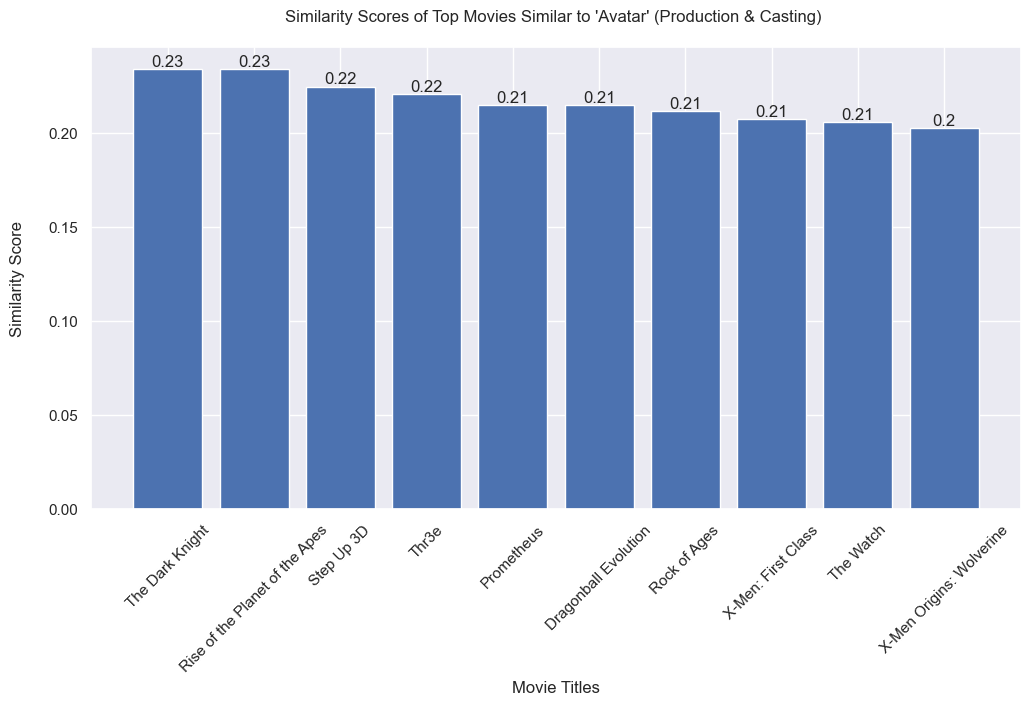

In [106]:
# Same apprach but with Production and Casting rather than Genre
sorted_indices_prod = np.argsort(-scores_prod)[1:]  

# Extracting titles and scores 
top_similar_movies_titles_prod = df.loc[sorted_indices_prod[:10], 'title']
top_similar_movies_scores_prod = scores_prod[sorted_indices_prod[:10]]

plt.figure(figsize=(12,6))
bars = plt.bar(top_similar_movies_titles_prod, top_similar_movies_scores_prod)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title("Similarity Scores of Top Movies Similar to 'Avatar' (Production & Casting) \n")
plt.xlabel("\n\nMovie Titles")
plt.ylabel("Similarity Score\n ")
plt.xticks(rotation=45)
plt.show()

In [110]:
def recommend(title):
    """
    Generate movie recommendations based on a given title.
    
    Parameters:
    title (str): The title of the movie for which recommendations are needed.
    df (DataFrame): The DataFrame containing movie information.
    movie_index (Series): Series mapping movie titles to their DataFrame indices.
    X_gen (sparse matrix): TF-IDF matrix for genres.
    X_prod (sparse matrix): TF-IDF matrix for production companies.

    Returns:
    None: Prints out the recommendations.
    """

    global df, movie_index, X_gen, X_prod

    # Check if the title is in the movie index
    if title not in movie_index:
        raise ValueError("Enter a Valid Title")
    
    # Title index
    idx = movie_index[title]

    # scores - genre and production company
    scores_gen = cosine_similarity(X_gen[idx], X_gen).flatten()
    scores_prod = cosine_similarity(X_prod[idx], X_prod).flatten()

    # Select the top 3 without the first one that equals the query
    recommended_gen_idx = np.argsort(-scores_gen)[1:4]
    recommended_prod_idx = np.argsort(-scores_prod)[1:4]

    # Getting the title
    suggestion_genre = df['title'].iloc[recommended_gen_idx]
    suggestion_by_production = df['title'].iloc[recommended_prod_idx]

   # print the results with better formatting
    print(f"Recommendations for '{title}':\n")

    print("Based on the Genre:")
    for i, film in enumerate(suggestion_genre, 1):
        print(f"  {i}. {film}")

    print("\n\nBased on the Production Company:")
    for i, film in enumerate(suggestion_by_production, 1):
        print(f"  {i}. {film}")


In [111]:
recommend('Avatar')

Recommendations for 'Avatar':

Based on the Genre:

1. Alien³

2. Aliens

3. Silent Running

Based on the Production Company:

1. The Dark Knight

2. Rise of the Planet of the Apes

3. Step Up 3D

In [117]:
recommend('Scream 3')

Recommendations for 'Scream 3':

Based on the Genre:

1. The Calling

2. Felicia's Journey

3. Friday the 13th: A New Beginning

Based on the Production Company:

1. Scream

2. Scream 2

3. Made of Honor

In [119]:
recommend('Fake movie Title')

ValueError: Enter a Valid Title